In [50]:
import numpy as np
import pandas as pd
import string

from collections import Counter
import seaborn as sns
sns.set_style("darkgrid")

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Explore and clean the data

In [3]:
main_dir = "/content/drive/My Drive/spam_messages/"

df = pd.read_csv(main_dir + 'spam.csv', encoding="latin-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# drop the last three cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Rename the columns
df.rename(columns={'v1':'class','v2':'text'},inplace=True)
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# check for missing values
df.isnull().sum()

class    0
text     0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

403

In [12]:
# drop duplicates values
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

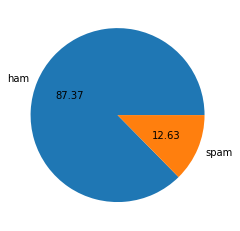

In [15]:
plt.pie(df['class'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
df['num_characters'] = df['text'].apply(len)

In [18]:
df.head()

,class,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# calculate the number of words and add a new column
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.head()

,class,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
# calculate the number of sentences and add a new columns
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,class,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
#Provide stats on the last three columns that were recently added
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


## Data Transformation

In [38]:
ps = PorterStemmer()

def transform_message(message):
    #Conver everything to lower case
    message = message.lower()
    #Get the list of words in the message
    word_list = nltk.word_tokenize(message)
    
    a = []
    for x in word_list:
        #Check if only characters and numbers are present in the list
        if x.isalnum():
            a.append(x)
    
    word_list = a[:]
    
    a = []
    # Remove stopwords and punctuations from the messages for fater processing
    for x in word_list:
        if x not in stopwords.words('english') and x not in string.punctuation:
            a.append(x)
            
    word_list = a[:]
    
    a = []
    for x in word_list:
        #Get stem of the word rather than the word used in the sentence
        a.append(ps.stem(x))
    
            
    return " ".join(a)

In [37]:
# transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
transform_message("I've been searching for the right words to thank you for this breather. "\
                  "I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.")

'search right word thank breather promis wont take help grant fulfil promis wonder bless time'

In [39]:
#Convert all messages into this latest lower case, without stopwords and stemmed format
df['transformed_text'] = df['text'].apply(transform_message)

In [40]:
df.head()

,class,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
spam_message_list = df[df['class'] == 1]['transformed_text'].tolist()
spam_corpus = []
for text in spam_message_list:
    for word in text.split():
        spam_corpus.append(word)

ham_message_list = df[df['class'] == 0]['transformed_text'].tolist()
ham_corpus = []
for text in ham_message_list:
    for word in text.split():
        ham_corpus.append(word)


In [42]:
len(spam_corpus)

9883

In [43]:
len(ham_corpus)

34771

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


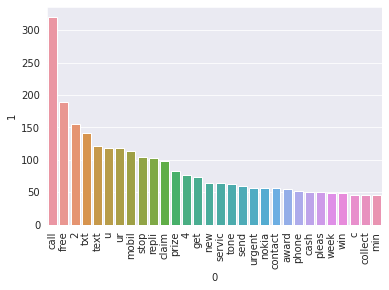

In [51]:
#Plotting most common words in spam corpus
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


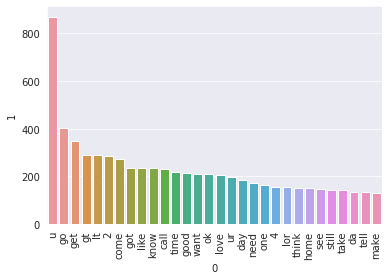

In [53]:
#Plotting most common words in ham corpus
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Apply ML algorithms to classify the text

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [55]:
tfidf = TfidfVectorizer(max_features=3000)

In [56]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
x.shape

(5169, 3000)

In [58]:
y = df['class'].values

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=47)

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
svm = SVC(kernel='rbf')
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression(solver='liblinear', penalty='l1')
rf = RandomForestClassifier(random_state=47)

In [71]:
clfs = {
    'Gaussian Naive Bayes' : gnb,
    'Support Vector Machine' : svm,
    'K Nearest Neighbor' : knn, 
    'Multinomial Naive Bayes': mnb, 
    'Decision Tree': dt, 
    'Logistic Regression': lr, 
    'Random Forest': rf
}

In [72]:
def train_classifier(clf, x_train, y_train, x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [67]:
train_classifier(rf,x_train,y_train,x_test,y_test)

(0.9806576402321083, 0.9626168224299065)

In [73]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    print ("***" * 20)

For  Gaussian Naive Bayes
Accuracy -  0.8733075435203095
Precision -  0.47391304347826085
************************************************************
For  Support Vector Machine
Accuracy -  0.9777562862669246
Precision -  0.9705882352941176
************************************************************
For  K Nearest Neighbor
Accuracy -  0.9264990328820116
Precision -  1.0
************************************************************
For  Multinomial Naive Bayes
Accuracy -  0.9835589941972921
Precision -  0.9903846153846154
************************************************************
For  Decision Tree
Accuracy -  0.9468085106382979
Precision -  0.8478260869565217
************************************************************
For  Logistic Regression
Accuracy -  0.9555125725338491
Precision -  0.8476190476190476
************************************************************
For  Random Forest
Accuracy -  0.9806576402321083
Precision -  0.9626168224299065
*************************************